In [1]:
import os
import sys
import pandas as pd

In [2]:
partition = input("Inserisci la partizione che vuoi utilizzare")
print("Hai inserito la partizione: ", partition)
partition = os.path.join("../partitioning/npy", partition)

foldername = input("Inserisci il nome della cartella dove salvare i risultati")
print("Hai inserito la cartella: ", foldername)

Hai inserito la partizione:  part_20_5
Hai inserito la cartella:  xgboost_part_20_5


In [3]:
import tensorflow as tf
print("GPU disponibile:", tf.config.list_physical_devices('GPU'))

2025-03-10 18:21:14.187738: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-X.Y/lib64
2025-03-10 18:21:14.187753: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


GPU disponibile: []


2025-03-10 18:21:18.649858: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-03-10 18:21:18.649893: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (paolo-Katana-15-B13VFK): /proc/driver/nvidia/version does not exist


In [4]:
sys.path.append("../models")

In [5]:
from xgboost_model import XGBoostModel

In [6]:
def load_partitions(root_path):
    file_names = ["X_train.csv", "X_test.csv", "X_val.csv", "y_train.csv", "y_test.csv", "y_val.csv"]
    datasets = [pd.read_csv(os.path.join(root_path, file)).values for file in file_names]
    return tuple(datasets)

In [7]:
# load data
X_train, X_test, X_val, y_train, y_test, y_val = load_partitions(partition)

# show partitions dimention
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (8959, 20), y_train shape: (8959, 1)
X_test shape: (1920, 20), y_test shape: (1920, 1)
X_val shape: (1919, 20), y_val shape: (1919, 1)


In [8]:
# initialize model
xgboost_model = XGBoostModel(foldername)

[0]	validation_0-rmse:0.12695	validation_1-rmse:0.12385
[1]	validation_0-rmse:0.12044	validation_1-rmse:0.11788
[2]	validation_0-rmse:0.11497	validation_1-rmse:0.11284
[3]	validation_0-rmse:0.11026	validation_1-rmse:0.10853
[4]	validation_0-rmse:0.10885	validation_1-rmse:0.10741
[5]	validation_0-rmse:0.10504	validation_1-rmse:0.10399
[6]	validation_0-rmse:0.10181	validation_1-rmse:0.10111
[7]	validation_0-rmse:0.09905	validation_1-rmse:0.09867
[8]	validation_0-rmse:0.09680	validation_1-rmse:0.09673
[9]	validation_0-rmse:0.09472	validation_1-rmse:0.09500
[10]	validation_0-rmse:0.09295	validation_1-rmse:0.09358
[11]	validation_0-rmse:0.09146	validation_1-rmse:0.09248
[12]	validation_0-rmse:0.09012	validation_1-rmse:0.09144
[13]	validation_0-rmse:0.08901	validation_1-rmse:0.09055
[14]	validation_0-rmse:0.08865	validation_1-rmse:0.09043
[15]	validation_0-rmse:0.08772	validation_1-rmse:0.08982
[16]	validation_0-rmse:0.08745	validation_1-rmse:0.08979
[17]	validation_0-rmse:0.08667	validation

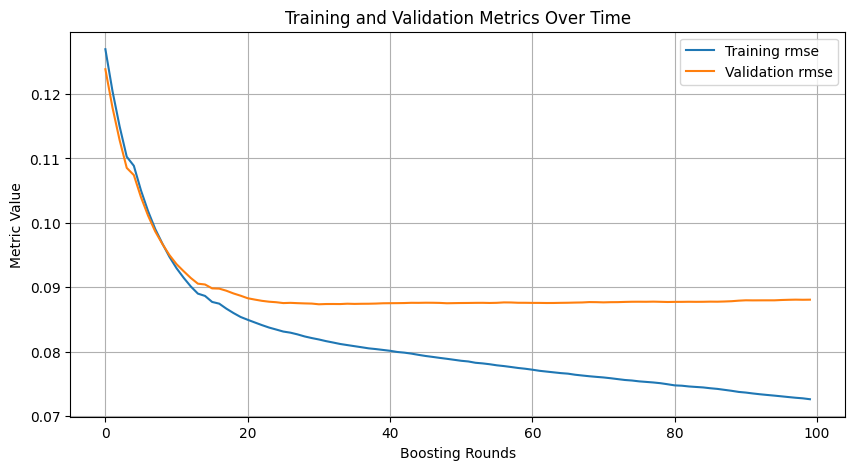

Grafico delle metriche di training salvato.


In [9]:
# training
xgboost_model.train(X_train, y_train, X_val, y_val)

In [10]:
xgboost_model.evaluate(X_test, y_test)

Metriche salvate in ./tests/xgboost_part_20_5/evaluation_metrics.csv


{'MSE': 0.00797775238269559,
 'RMSE': 0.08931826455264114,
 'MAE': 0.06711916039886785,
 'R2': 0.5573835944675449}

In [11]:
xgboost_model.save_model()

Modello salvato in ./tests/xgboost_part_20_5/xgboost_model.json


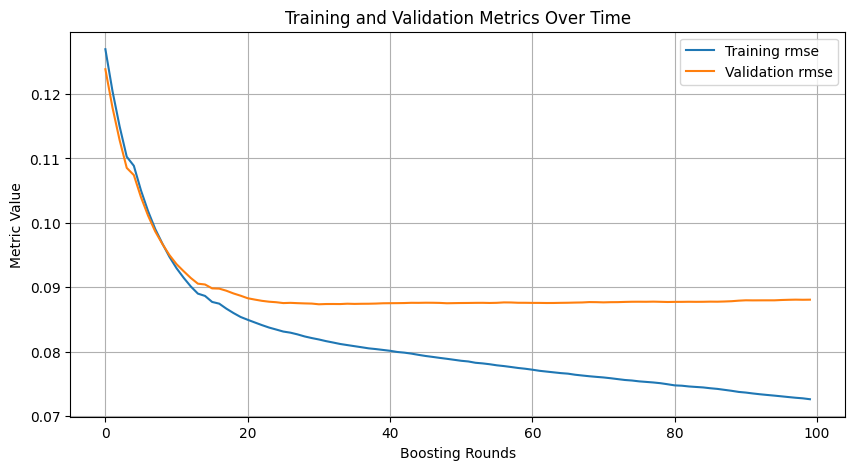

Grafico delle metriche di training salvato.


In [12]:
xgboost_model.plot_training_metrics()

In [ ]:
y_pred = xgboost_model.predict(X_test)

In [ ]:
xgboost_model.compare_predictions(y_test, y_pred);